# Simple Linear Regression Example (Study Hours (X), Success (y))

Simple Linear Regression is a statistical method used to model the **relationship between two variables** by fitting a straight line to the observed data. In this context, one variable is considered the independent variable (predictor), and the other is the dependent variable (response). 

**The goal is to find the best-fitting line (regression line) that predicts the dependent variable based on the independent variable.** This technique is commonly used to understand how changes in one variable are associated with changes in another.

In [1]:
# %% [1. Imports and Setup]
# - pandas: Data manipulation (DataFrames)
# - numpy: Numerical operations
# - matplotlib/seaborn: Visualization
# - scikit-learn: Machine learning tools (splitting, scaling, modeling, evaluation)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Visualization settings
%matplotlib inline
sns.set_style("whitegrid")  # Clean background for plots

In [4]:
# %% [2. Load Data]
# - Read CSV file into a DataFrame
# - Check the first 5 rows to verify data structure

df = pd.read_csv('1_1_simple_linear_study_hour_score_relation_dataset.csv')
df.head(10)

,study_hours,exam_score
0,1.0,35
1,1.5,40
2,2.0,48
3,2.5,280
4,3.0,40
5,3.5,60
6,4.0,42
7,4.5,58
8,5.0,65
9,5.5,40


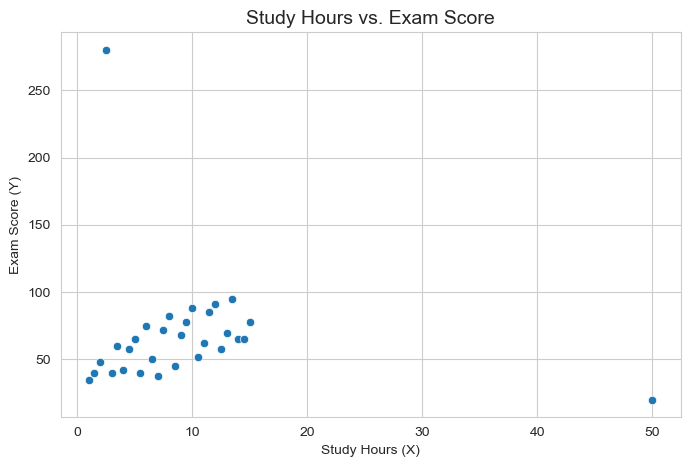

In [77]:
# %% [3. Exploratory Data Analysis (EDA)]
# - Scatterplot to visualize the relationship between X (study_hours) and y (exam_score)
# - Helps identify linearity, outliers, and trends

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='study_hours', y='exam_score')
plt.title("Study Hours vs. Exam Score", fontsize=14)
plt.xlabel("Study Hours (X)")
plt.ylabel("Exam Score (Y)")
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   study_hours  30 non-null     float64
 1   exam_score   30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [79]:
df.describe()

,study_hours,exam_score
count,30.000000,30.000000
mean,9.400000,68.166667
std,8.734987,44.144030
min,1.000000,20.000000
25%,4.625000,45.750000
50%,8.250000,63.500000
75%,11.875000,77.250000
max,50.000000,280.000000


In [6]:
# find outliers
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)

# IQR is the interquartile range
IQR= Q3 - Q1
print("IQR:\n", IQR)

# Define outlier step (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print("Lower Bound:\n", lower_bound)
print("Upper Bound:\n", upper_bound)

outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()}")

df[outliers].sort_values(by='exam_score')

IQR:
 study_hours     7.25
exam_score     31.50
dtype: float64
Lower Bound:
 study_hours   -6.25
exam_score    -1.50
dtype: float64
Upper Bound:
 study_hours     22.75
exam_score     124.50
dtype: float64
Number of outliers detected: 2


,study_hours,exam_score
29,50.0,20
3,2.5,280


In [7]:
df[outliers].index

Index([3, 29], dtype='int64')

In [9]:
#drop outliers by row index
df =df.drop(df[outliers].index)
#or df = df[~outliers]
#or df = df[df[outliers]==False]

In [83]:
df.describe()

,study_hours,exam_score
count,28.000000,28.000000
mean,8.196429,62.321429
std,4.199513,17.598513
min,1.000000,35.000000
25%,4.875000,47.250000
50%,8.250000,63.500000
75%,11.625000,75.750000
max,15.000000,95.000000


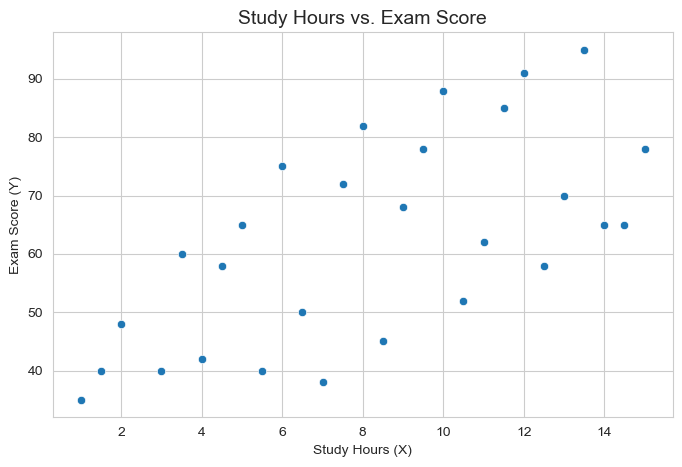

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='study_hours', y='exam_score')
plt.title("Study Hours vs. Exam Score", fontsize=14)
plt.xlabel("Study Hours (X)")
plt.ylabel("Exam Score (Y)")
plt.show()

Splitting data into a **train set** and a **test set** is a fundamental step in machine learning workflows. 

- **Train Set:** Used to fit (train) the model, allowing it to learn patterns from the data.
- **Test Set:** Used to evaluate the model's performance on unseen data, simulating how it would perform in real-world scenarios.

**Why split?**
- Prevents overfitting: Ensures the model does not just memorize the training data.
- Measures generalization: Assesses how well the model predicts new, unseen data.
- Provides unbiased evaluation: Test set results give a realistic estimate of model accuracy.

This approach helps build robust models that perform well not only on the data they were trained on, but also on new data.


In [12]:
# %% [4. Train-Test Split]
# - Split data into training (80%) and test sets (20%)
# - random_state=42 ensures reproducibility
# - X must be 2D (e.g., df[['study_hours']]), y is 1D (e.g., df['exam_score'])

X = df[['study_hours']]  # Feature matrix (2D)
y = df['exam_score']      # Target vector (1D)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Train/Test Split: {X_train.shape[0]}/{X_test.shape[0]} samples")

Train/Test Split: 22/6 samples


------------------

<img src="https://miro.medium.com/1*Bx8sWhleKvBdSWECm6eeFg.png"/>

In [13]:
# %% [5. Feature Scaling]
# - StandardScaler standardizes features to mean=0, std=1
# - Prevents features with larger scales from dominating the model
# - fit_transform on train data, transform on test data (no data leakage)

# I just scale X features
# learn what is data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform train data
X_test_scaled = scaler.transform(X_test)       # Only transform test data

In [15]:
X_test_scaled

array([[-0.5761387 ],
       [ 1.39280131],
       [-0.69919745],
       [ 0.90056631],
       [-1.8067262 ],
       [-0.20696244]])

Standardization transforms features so they have a mean of 0 and a standard deviation of 1. This is important because:

- **Equal Scale:** Many machine learning algorithms (including linear regression) are sensitive to the scale of input features. Features with larger ranges can dominate the model, leading to biased results.
- **Improved Convergence:** Algorithms that use gradient descent (or similar optimization) converge faster and more reliably when features are standardized.
- **Prevents Data Leakage:** Standardization is fit on the training data and applied to test data, ensuring the model does not "see" test data during training.

In summary, standardizing X features helps build more accurate and robust models by ensuring all features contribute equally.

Normalization and standardization are used when features in your dataset have different scales or units. 

- **Normalization** (scaling to [0, 1] or [-1, 1]) is useful when you want all features to have the same range, especially for algorithms sensitive to magnitude (e.g., k-NN, neural networks).
- **Standardization** (mean=0, std=1) is preferred when features have outliers or are not bounded, and for algorithms that assume normally distributed data (e.g., linear regression, logistic regression).

Use these techniques to ensure fair contribution of all features and improve model performance.

In [16]:
# %% [6. Model Training]
# - Initialize and fit Linear Regression model
# - Model learns coefficients (β1: slope, β0: intercept)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [87]:
# Print learned coefficients
print("\nModel Coefficients:")
print(f"Slope (β1): {model.coef_[0]:.2f}")      # Change in Y per unit change in X (scaled)
print(f"Intercept (β0): {model.intercept_:.2f}") # Y when X=0 (scaled space)


Model Coefficients:
Slope (β1): 10.47
Intercept (β0): 62.14


Model coefficients in linear regression represent the relationship between the input feature(s) and the target variable. 

The **slope** (coefficient) shows how much the target changes for each unit increase in the feature, 

while the **intercept** is the predicted value when all features are zero. These values define the regression line used for prediction.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20231129130431/11111111.png"/>

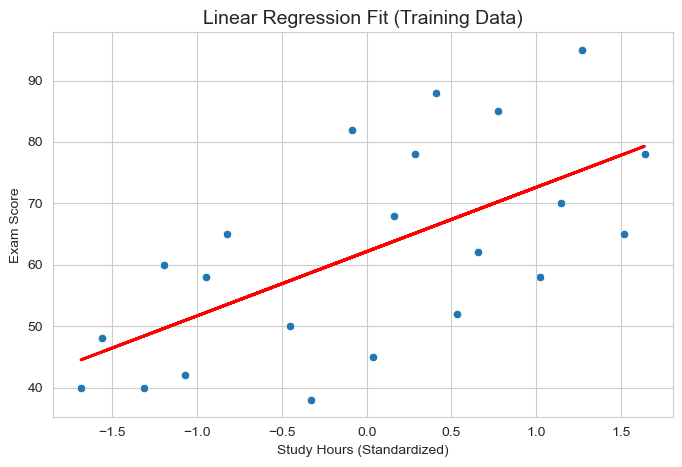

In [88]:
# %% [7. Training Data Visualization]
# - Plot training data points and regression line
# - Red line shows model predictions

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_train_scaled.flatten(), y=y_train)
plt.plot(X_train_scaled, model.predict(X_train_scaled), 'r-', linewidth=2)
plt.title("Linear Regression Fit (Training Data)", fontsize=14)
plt.xlabel("Study Hours (Standardized)")
plt.ylabel("Exam Score")
plt.show()

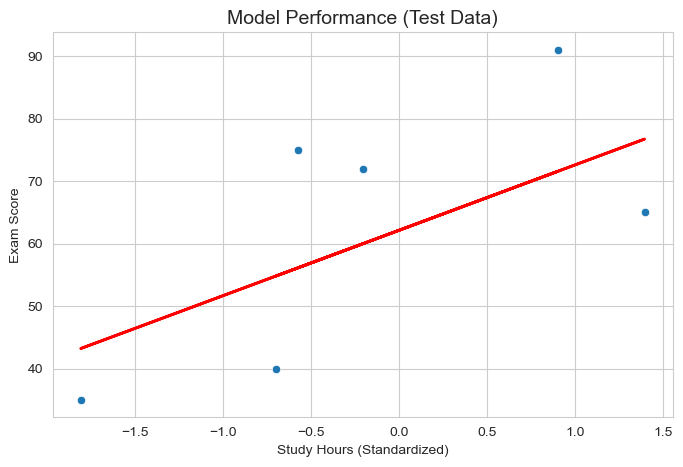

In [89]:
# %% [8. Test Data Evaluation]
# - Predict on test data (unseen during training)
# - Plot predictions vs. actual values

y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test_scaled.flatten(), y=y_test)
plt.plot(X_test_scaled, y_pred, 'r-', linewidth=2)
plt.title("Model Performance (Test Data)", fontsize=14)
plt.xlabel("Study Hours (Standardized)")
plt.ylabel("Exam Score")
plt.show()

In [90]:
# %% [9. Performance Metrics]
# - MSE: Mean Squared Error (smaller = better)
# - RMSE: Root MSE (interpretable in original units)
# - MAE: Mean Absolute Error (robust to outliers)
# - R²: Proportion of variance explained (0-1, higher = better)
# - Adjusted R²: Penalizes useless features (for multiple regression)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("\nPerformance Metrics:")
print(f"MSE: {mse:.2f}")          
print(f"RMSE: {rmse:.2f}")        
print(f"MAE: {mae:.2f}")          
print(f"R²: {r2:.4f}")            
print(f"Adjusted R²: {adj_r2:.4f}")


Performance Metrics:
MSE: 217.31
RMSE: 14.74
MAE: 14.19
R²: 0.4394
Adjusted R²: 0.2993


In [96]:
# %% [10. New Predictions]
# - Function to predict exam score for new study hours
# - Scales input using the SAME scaler (critical for consistency)

def predict_score(hours):
    scaled_input = scaler.transform([[hours]])  # Scale new data
    return model.predict(scaled_input)[0]       # Predict and return

print("\nSample Predictions:")
for hour in [5, 10, 20]:
    print(f"Predicted score for {hour} hours: {predict_score(hour):.1f}")


Sample Predictions:
Predicted score for 5 hours: 53.5
Predicted score for 10 hours: 66.4
Predicted score for 20 hours: 92.2


c:\Users\guray.arik\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\guray.arik\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\guray.arik\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
